In [3]:
from utils.anomaly_detection_use_case import *
from utils.data_exploration_utils import *
from utils.data_preparation_utils import *
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings("ignore")

# Retrieving Data

In [4]:
df = pd.read_excel('SWaT.A3_dataset_labelled.xlsx', engine='openpyxl', header=1)

In [5]:
df = df.iloc[1:]
df.columns.values[0] = "timestamp"
df

,timestamp,Attack,Label,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,...,LSH 601,LSH 602,LSH 603,LSL 601,LSL 602,LSL 603,P6 STATE,P601 Status,P602 Status,P603 Status
1,2019-07-20T04:30:00Z,NaN,NaN,0,729.8658,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
2,2019-07-20T04:30:01Z,NaN,NaN,0,729.434,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
3,2019-07-20T04:30:02.004013Z,NaN,NaN,0,729.12,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
4,2019-07-20T04:30:03.004013Z,NaN,NaN,0,728.6882,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
5,2019-07-20T04:30:04Z,NaN,NaN,0,727.7069,1,3,2,1,142.527557,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14992,2019-07-20T08:39:55.001007Z,NaN,NaN,4.200429,491.169769,2,2,2,1,131.408615,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
14993,2019-07-20T08:39:56.0050048Z,NaN,NaN,4.253915,491.405273,2,2,2,1,131.408615,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
14994,2019-07-20T08:39:57.0050048Z,NaN,NaN,4.303558,492.3081,2,2,2,1,131.408615,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1
14995,2019-07-20T08:39:58.0050048Z,NaN,NaN,4.323736,492.4651,2,2,2,1,131.408615,...,"{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Active', u'Val...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Inactive', u'V...","{u'IsSystem': False, u'Name': u'Active', u'Val...",2,1,1,1


# Preprocessing

On transforme les données sous forme de dict en plusieurs colonnes pour pouvoir encoder les données. La colonne Name est supprimée car elle ne nous est pas utile, toute les valeurs sont les memes pour la meme colonne.

In [6]:
import ast


# Function to convert string representation of dictionary to actual dictionary
def string_to_dict(s):
    try:
        return ast.literal_eval(s)
    except:
        return {}

# Columns that start with "LSH-" and "LSL-"
lsh_lsl_columns = [col for col in df.columns if col.startswith("LS")]

# Extract the values from these columns
for col in lsh_lsl_columns:
    # Convert strings to dictionaries for the current column
    df[f"{col}_dict"] = df[col].apply(string_to_dict)
    
    # Extract all keys from the dictionary in separate columns
    if df[f"{col}_dict"].iloc[0]:  # Check if the dictionary is not empty
        for key in df[f"{col}_dict"].iloc[0].keys():
            if key == "Name":  # Skip the "Name" key
                continue
            df[f"{col}_{key}"] = df[f"{col}_dict"].apply(lambda x: x.get(key, None))

# Drop columns that end with "_dict"
dict_columns = [col for col in df.columns if col.endswith("_dict")]
df.drop(columns=dict_columns, inplace=True)

# drop the columns in the list lsh_lsl_columns
df.drop(columns=lsh_lsl_columns, inplace=True)


In [7]:
df.columns

Index(['timestamp', 'Attack', 'Label', 'FIT 101', 'LIT 101', 'MV 101',
       'P1_STATE', 'P101 Status', 'P102 Status', 'AIT 201', 'AIT 202',
       'AIT 203', 'FIT 201', 'MV201', 'P2_STATE', 'P201 Status', 'P202 Status',
       'P203 Status', 'P204 Status', 'P205 Status', 'P206 Status',
       'P207 Status', 'P208 Status', 'AIT 301', 'AIT 302', 'AIT 303',
       'DPIT 301', 'FIT 301', 'LIT 301', 'MV 301', 'MV 302', 'MV 303',
       'MV 304', 'P3_STATE', 'P301 Status', 'P302 Status', 'AIT 401',
       'AIT 402', 'FIT 401', 'LIT 401', 'P4_STATE', 'P401 Status',
       'P402 Status', 'P403 Status', 'P404 Status', 'UV401', 'AIT 501',
       'AIT 502', 'AIT 503', 'AIT 504', 'FIT 501', 'FIT 502', 'FIT 503',
       'FIT 504', 'MV 501', 'MV 502', 'MV 503', 'MV 504', 'P5_STATE',
       'P501 Status', 'P502 Status', 'PIT 501', 'PIT 502', 'PIT 503',
       'FIT 601', 'P6 STATE', 'P601 Status', 'P602 Status', 'P603 Status',
       'LS 201_IsSystem', 'LS 201_Value', 'LS 202_IsSystem', 'LS 202_Valu

Compléter la colonne ‘Attack’ avec la valeur ‘benign’ si elle n’est pas définie et la colonne ‘Label’ avec 0 si elle n’est pas définie

In [8]:
# Compléter la colonne ‘Attack’ avec la valeur ‘benign’ si elle n’est pas définie et la colonne ‘Label’ avec 0 si elle n’est pas définie
df['Attack'] = df['Attack'].fillna('benign')
df['Label'] = df['Label'].fillna(0)
df['Label'] = df['Label'].astype(int)

Identifiez et visualisez les outliers (d’après Isolation Forrest ; d’après LOF)

In [9]:
potential_numeric_cols = df.columns[3:]
# Infer the types of the columns knowing some should keep object type
# Loop on each column, look at the first value and infer the type
for col in potential_numeric_cols:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        print(f"Could not convert column {col} to numeric")


In [10]:
# Print unique attacks type
print(df['Attack'].unique())

['benign' 'Spoofing' 'Switch_ON' 'Switch_close' 'Switch_off']


In [11]:
# Get all the columns except the first 3 (timestamp, Attack, Label)
df_to_enc = df.iloc[:, 2:]
df_to_enc

,Label,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,...,LSH 602_IsSystem,LSH 602_Value,LSH 603_IsSystem,LSH 603_Value,LSL 601_IsSystem,LSL 601_Value,LSL 602_IsSystem,LSL 602_Value,LSL 603_IsSystem,LSL 603_Value
1,0,0.000000,729.865800,1,3,2,1,142.527557,9.293002,198.077423,...,False,1,False,0,False,0,False,0,False,1
2,0,0.000000,729.434000,1,3,2,1,142.527557,9.293002,198.385025,...,False,1,False,0,False,0,False,0,False,1
3,0,0.000000,729.120000,1,3,2,1,142.527557,9.293002,198.436300,...,False,1,False,0,False,0,False,0,False,1
4,0,0.000000,728.688200,1,3,2,1,142.527557,9.289157,198.667000,...,False,1,False,0,False,0,False,0,False,1
5,0,0.000000,727.706900,1,3,2,1,142.527557,9.289157,198.897720,...,False,1,False,0,False,0,False,0,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14992,0,4.200429,491.169769,2,2,2,1,131.408615,9.319918,257.703156,...,False,1,False,0,False,0,False,0,False,1
14993,0,4.253915,491.405273,2,2,2,1,131.408615,9.317354,257.703156,...,False,1,False,0,False,0,False,0,False,1
14994,0,4.303558,492.308100,2,2,2,1,131.408615,9.317354,257.703156,...,False,1,False,0,False,0,False,0,False,1
14995,0,4.323736,492.465100,2,2,2,1,131.408615,9.316713,257.703156,...,False,1,False,0,False,0,False,0,False,1


In [12]:
one_hot_enc = get_one_hot_encoded_dataframe(df_to_enc)
one_hot_enc

,Label,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,...,LSH 602_IsSystem,LSH 602_Value,LSH 603_IsSystem,LSH 603_Value,LSL 601_IsSystem,LSL 601_Value,LSL 602_IsSystem,LSL 602_Value,LSL 603_IsSystem,LSL 603_Value
1,0,0.000000,729.865800,1,3,2,1,142.527557,9.293002,198.077423,...,False,1,False,0,False,0,False,0,False,1
2,0,0.000000,729.434000,1,3,2,1,142.527557,9.293002,198.385025,...,False,1,False,0,False,0,False,0,False,1
3,0,0.000000,729.120000,1,3,2,1,142.527557,9.293002,198.436300,...,False,1,False,0,False,0,False,0,False,1
4,0,0.000000,728.688200,1,3,2,1,142.527557,9.289157,198.667000,...,False,1,False,0,False,0,False,0,False,1
5,0,0.000000,727.706900,1,3,2,1,142.527557,9.289157,198.897720,...,False,1,False,0,False,0,False,0,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14992,0,4.200429,491.169769,2,2,2,1,131.408615,9.319918,257.703156,...,False,1,False,0,False,0,False,0,False,1
14993,0,4.253915,491.405273,2,2,2,1,131.408615,9.317354,257.703156,...,False,1,False,0,False,0,False,0,False,1
14994,0,4.303558,492.308100,2,2,2,1,131.408615,9.317354,257.703156,...,False,1,False,0,False,0,False,0,False,1
14995,0,4.323736,492.465100,2,2,2,1,131.408615,9.316713,257.703156,...,False,1,False,0,False,0,False,0,False,1


In [13]:
l1 = df_to_enc.columns.to_list()
l2 = one_hot_enc.columns.to_list()

In [14]:
def compare_lists(l1, l2):
    common_vars = set(l1) & set(l2)
    only_in_l1 = set(l1) - set(l2)
    only_in_l2 = set(l2) - set(l1)
    
    print("Common variables:", common_vars)
    print("Only in l1:", only_in_l1)
    print("Only in l2:", only_in_l2)

compare_lists(l1, l2)


Common variables: {'MV 101', 'LSL 601_Value', 'FIT 101', 'LSH 602_IsSystem', 'P501 Status', 'MV 301', 'LSL 603_IsSystem', 'P204 Status', 'P202 Status', 'LSL 601_IsSystem', 'LIT 401', 'LIT 101', 'P6 STATE', 'MV 302', 'FIT 301', 'LS 401_Value', 'AIT 502', 'PIT 503', 'LIT 301', 'P5_STATE', 'FIT 502', 'FIT 504', 'AIT 202', 'LSH 601_Value', 'P201 Status', 'P206 Status', 'AIT 303', 'P402 Status', 'P502 Status', 'LS 201_Value', 'AIT 203', 'P603 Status', 'AIT 503', 'LSLL 203_Value', 'LSL 603_Value', 'FIT 501', 'P4_STATE', 'LSL 203_IsSystem', 'LSH 602_Value', 'LS 202_IsSystem', 'LS 201_IsSystem', 'P302 Status', 'P205 Status', 'LS 202_Value', 'P2_STATE', 'LSH 603_Value', 'AIT 501', 'AIT 301', 'LSL 203_Value', 'DPIT 301', 'P102 Status', 'MV 504', 'PIT 501', 'P3_STATE', 'FIT 601', 'MV 303', 'LSL 602_Value', 'LSLL 203_IsSystem', 'FIT 201', 'FIT 401', 'AIT 401', 'P602 Status', 'AIT 302', 'AIT 201', 'P1_STATE', 'LSH 601_IsSystem', 'LS 401_IsSystem', 'P601 Status', 'P101 Status', 'LSH 603_IsSystem', '

In [17]:
# Save one hot enc as csv
one_hot_enc.to_csv("data/one_hot_enc.csv", index=False)


# Anomaly detection

func for confusion matrix

In [13]:
def plot_confusion_matrix(df, actual_col, predicted_col):
    """
    Plots a 2x2 confusion matrix using Seaborn.

    Args:
    - df (pd.DataFrame): The DataFrame containing the data.
    - actual_col (str): The column name of the actual labels.
    - predicted_col (str): The column name of the predicted labels (or in this case, outlier indicators).
    """
    
    matrix = confusion_matrix(df[actual_col], df[predicted_col])

    df_confusion = pd.DataFrame(matrix, index=['True 0', 'True 1'], columns=['Pred 0', 'Pred 1'])
    
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(df_confusion, annot=True, fmt='g', cmap='Blues', linewidths=.5, ax=ax)

    plt.title("Confusion Matrix", fontsize=20)
    plt.xlabel("Predicted", fontsize=18)
    plt.ylabel("Actual", fontsize=18)
    plt.show()

# For usage, you'd call it like:
# plot_confusion_matrix(df_analysis, 'Label', 'if_outlier')


## Isolation Forest

In [32]:
if_outliers = get_list_of_if_outliers(one_hot_enc.iloc[:, 1:], outlier_fraction=0.05)
len(if_outliers)

750

In [33]:
df_analysis = df.copy()
# Create a column outlier that has 1 if index corresponds to an outlier, 0 otherwise
df_analysis['if_outlier'] = 0
df_analysis.loc[if_outliers, 'if_outlier'] = 1
df_analysis

,timestamp,Attack,Label,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,...,LSH 603_IsSystem,LSH 603_Value,LSL 601_IsSystem,LSL 601_Value,LSL 602_IsSystem,LSL 602_Value,LSL 603_IsSystem,LSL 603_Value,lof_outlier,if_outlier
1,2019-07-20T04:30:00Z,benign,0,0.000000,729.865800,1,3,2,1,142.527557,...,False,0,False,0,False,0,False,1,0,1
2,2019-07-20T04:30:01Z,benign,0,0.000000,729.434000,1,3,2,1,142.527557,...,False,0,False,0,False,0,False,1,0,1
3,2019-07-20T04:30:02.004013Z,benign,0,0.000000,729.120000,1,3,2,1,142.527557,...,False,0,False,0,False,0,False,1,0,1
4,2019-07-20T04:30:03.004013Z,benign,0,0.000000,728.688200,1,3,2,1,142.527557,...,False,0,False,0,False,0,False,1,0,1
5,2019-07-20T04:30:04Z,benign,0,0.000000,727.706900,1,3,2,1,142.527557,...,False,0,False,0,False,0,False,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14992,2019-07-20T08:39:55.001007Z,benign,0,4.200429,491.169769,2,2,2,1,131.408615,...,False,0,False,0,False,0,False,1,0,0
14993,2019-07-20T08:39:56.0050048Z,benign,0,4.253915,491.405273,2,2,2,1,131.408615,...,False,0,False,0,False,0,False,1,0,0
14994,2019-07-20T08:39:57.0050048Z,benign,0,4.303558,492.308100,2,2,2,1,131.408615,...,False,0,False,0,False,0,False,1,0,0
14995,2019-07-20T08:39:58.0050048Z,benign,0,4.323736,492.465100,2,2,2,1,131.408615,...,False,0,False,0,False,0,False,1,0,0


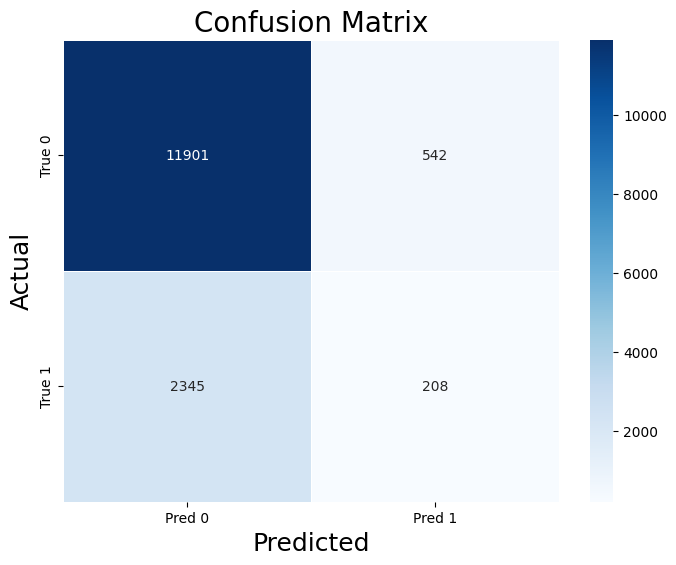

In [34]:
plot_confusion_matrix(df_analysis, 'Label', 'if_outlier')

## Local Outlier Factor

In [31]:
lof_outliers = get_list_of_lof_outliers(one_hot_enc.iloc[:, 1:], outlier_fraction=0.05)
df_analysis['lof_outlier'] = 0
df_analysis.loc[lof_outliers, 'lof_outlier'] = 1

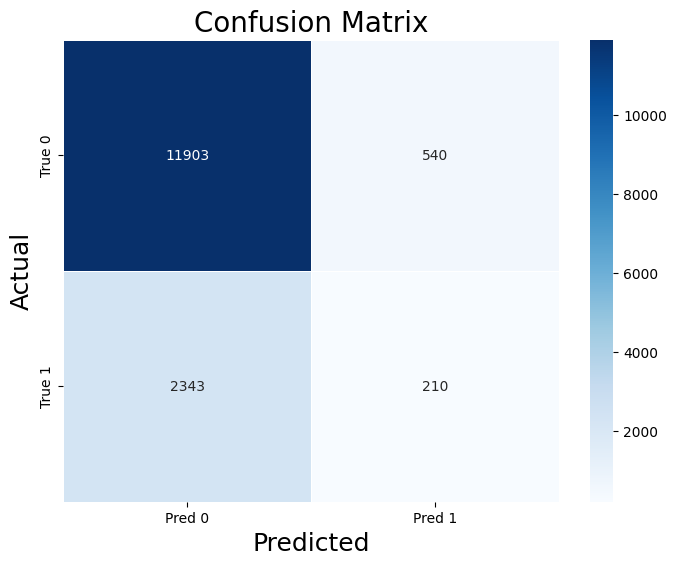

In [20]:
plot_confusion_matrix(df_analysis, 'Label', 'lof_outlier')

### Analysis

In [21]:
# Count the label == 1 for each attack type
df_analysis['Attack'].value_counts()

benign          12443
Switch_off       1362
Switch_ON         680
Spoofing          367
Switch_close      144
Name: Attack, dtype: int64

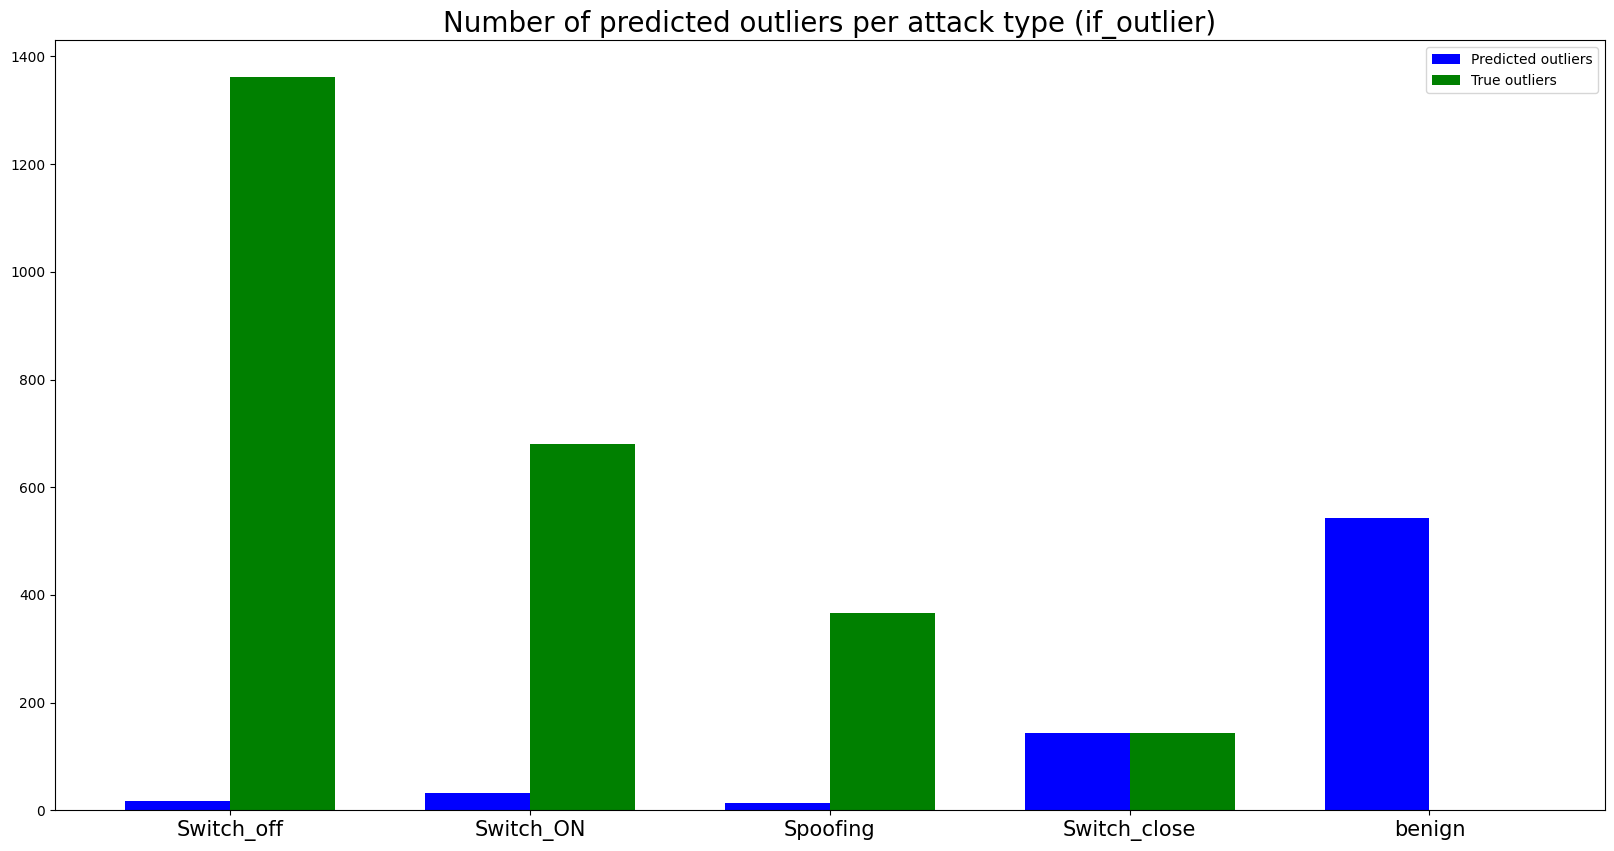

In [52]:
import matplotlib.pyplot as plt
def visualize_outliers(df, col_name):
    outliers = df[(df[col_name] == 1)]
    outliers_true = df[(df['Label'] == 1)]

    plt.figure(figsize=(20, 10))
    width = 0.35

    # Sort the data by the number of "True outliers" in descending order
    outliers_true_counts = outliers_true['Attack'].value_counts()
    outliers_counts = outliers['Attack'].value_counts()

    # Add the 'benign' attack type to the outliers_true_counts Series with value of 0
    outliers_true_counts['benign'] = 0
    # Reorder the outliers_counts Series to match the order of outliers_true_counts
    outliers_counts = outliers_counts[outliers_true_counts.index]
    
    plt.bar([x for x in range(len(outliers_counts))], outliers_counts.values, color='blue', label='Predicted outliers', width=width)
    plt.bar([x + width for x in range(len(outliers_true_counts))], outliers_true_counts.values, color='green', label='True outliers', width=width)

    plt.xticks([x + width/2 for x in range(len(outliers_true_counts))], outliers_true_counts.index, fontsize=15)

    plt.title(f"Number of predicted outliers per attack type ({col_name})", fontsize=20)
    plt.legend()

visualize_outliers(df_analysis, 'if_outlier')

### Segmenting each plant into datframes

In [24]:
# Convert set to list and sort
numeric_identifiers_list = ['10', '20','30', '40', '50', '60']

# Split the dataset based on numeric identifiers
split_dataframes = {}
for num in numeric_identifiers_list:
    # Append Attack and Label columns
    cols_for_num = ['Label']
    cols_for_num.extend([col for col in one_hot_enc.columns if num in col])
    
    split_dataframes[f"P{int(num) // 10 }"] = one_hot_enc[cols_for_num]

In [25]:
split_dataframes['P5']

,Label,AIT 501,AIT 502,AIT 503,AIT 504,FIT 501,FIT 502,FIT 503,FIT 504,MV 501,MV 502,MV 503,MV 504,P501 Status,P502 Status,PIT 501,PIT 502,PIT 503
1,0,7.489618,147.398100,1016.27789,46.065113,0.781594,0.310362,0.623628,0.213432,2,2,1,1,2,1,167.601257,2.963509,119.921173
2,0,7.489618,147.398100,1016.27789,45.757500,0.782235,0.315102,0.623628,0.212984,2,2,1,1,2,1,167.601257,2.963509,119.921173
3,0,7.489618,147.398100,1016.27789,45.603690,0.782235,0.317023,0.623628,0.212984,2,2,1,1,2,1,167.601257,2.963509,119.921173
4,0,7.489618,147.167389,1016.27789,45.603690,0.783133,0.308057,0.623628,0.212792,2,2,1,1,2,1,167.601257,2.963509,119.921173
5,0,7.489618,147.090485,1016.27789,45.219173,0.783773,0.303446,0.623628,0.214009,2,2,1,1,2,1,167.601257,2.963509,119.921173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14992,0,7.765830,63.752884,1016.21381,24.839785,0.809536,0.366594,0.607752,0.209909,2,2,1,1,2,1,158.773392,2.498959,113.784927
14993,0,7.765830,63.752884,1016.21381,24.839785,0.809536,0.374023,0.605960,0.209909,2,2,1,1,2,1,158.805435,2.498959,113.784927
14994,0,7.765830,63.752884,1016.21381,24.839785,0.809536,0.369156,0.605960,0.209909,2,2,1,1,2,1,158.853500,2.498959,113.784927
14995,0,7.765830,63.752884,1016.21381,24.839785,0.809536,0.357115,0.605960,0.209909,2,2,1,1,2,1,158.853500,2.498959,113.784927


In [63]:
def get_ratio_if_outliers(df):
    if_outliers = get_list_of_if_outliers(df.iloc[:, 1:], outlier_fraction=0.01)
    df['if_outlier'] = 0
    df.loc[if_outliers, 'if_outlier'] = 1
    # df[df['if_outlier'] == 1]['Label'].value_counts()
    return if_outliers

In [64]:
def get_ratio_lof_outliers(df):
    lof_outliers = get_list_of_lof_outliers(df.iloc[:, 1:], outlier_fraction=0.01)
    df['lof_outlier'] = 0
    df.loc[lof_outliers, 'lof_outlier'] = 1
    # return df[df['lof_outlier'] == 1]['Label'].value_counts()
    return lof_outliers

In [65]:
df_analysis2 = df.copy()
# Create a column outlier that has 1 if index corresponds to an outlier, 0 otherwise

all_if_outliers = []
all_lof_outliers = []
for key, value in split_dataframes.items():
    # print("If_outliers ratio: ", key)
    all_if_outliers.append(get_ratio_if_outliers(value))
    all_lof_outliers.append(get_ratio_lof_outliers(df))

array = np.array(all_if_outliers)
merged_list = [item for sublist in array for item in sublist]
if_outliers = list(np.unique(merged_list))

array = np.array(all_lof_outliers)
merged_list = [item for sublist in array for item in sublist]
lof_outliers = list(np.unique(merged_list))

df_analysis2['if_outlier'] = 0
df_analysis2.loc[if_outliers, 'if_outlier'] = 1
#df_analysis2

df_analysis2['lof_outlier'] = 0
df_analysis2.loc[lof_outliers, 'lof_outlier'] = 1
#df_analysis2

print(df_analysis2[df_analysis2['if_outlier'] == 1]['Label'].value_counts())
print(df_analysis2[df_analysis2['lof_outlier'] == 1]['Label'].value_counts())

0    367
1    303
Name: Label, dtype: int64
0    115
1     44
Name: Label, dtype: int64


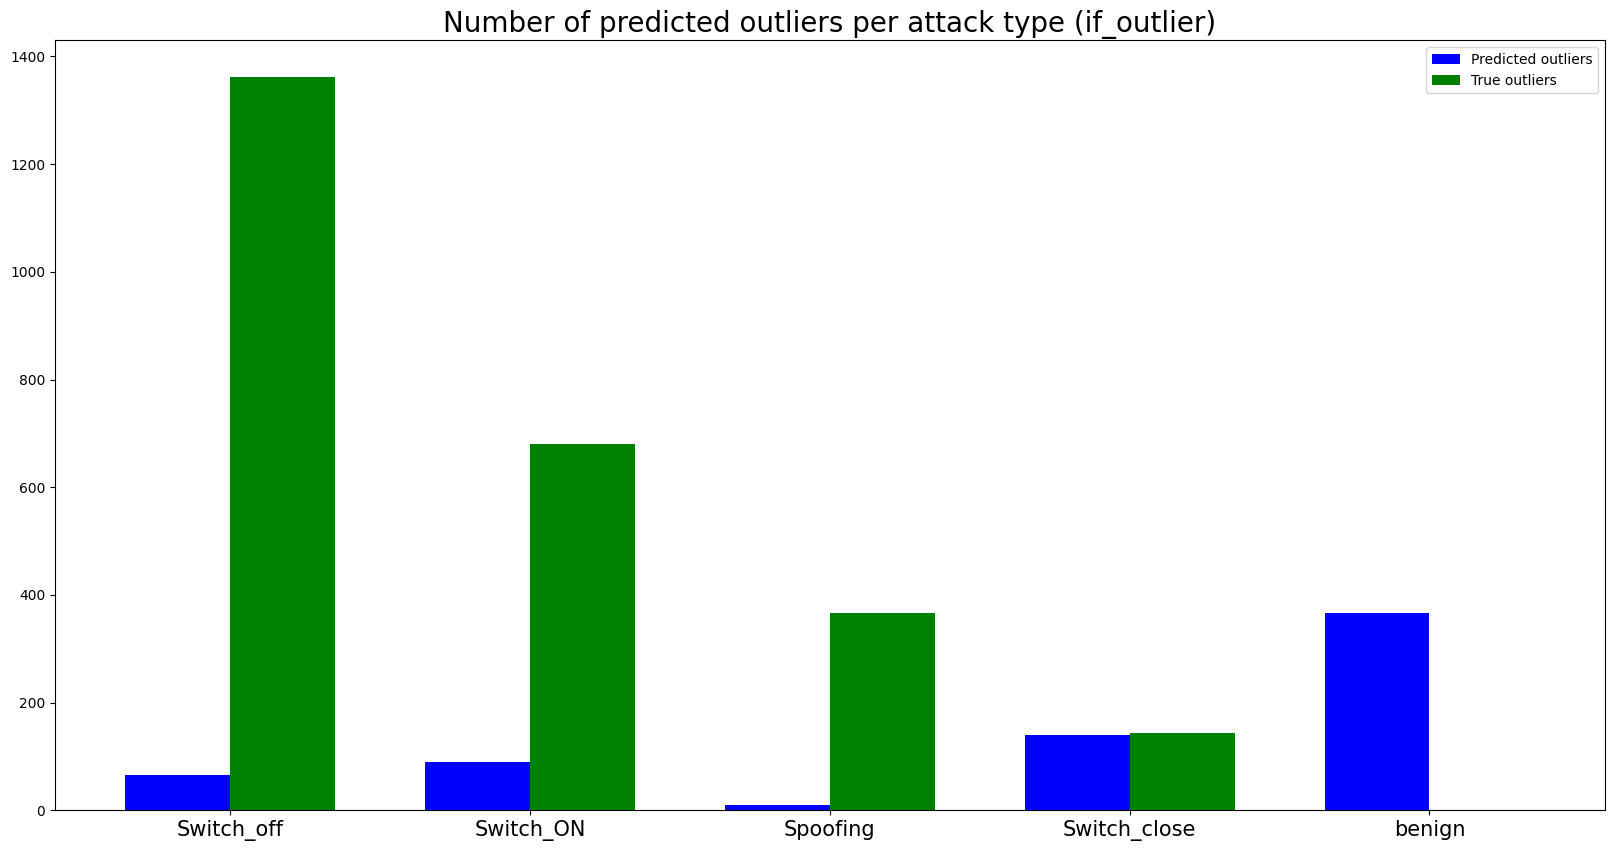

In [66]:
visualize_outliers(df_analysis2, 'if_outlier')

The results are not better than single dataframe.

## LSTM and RMS

In [77]:
print(one_hot_enc.shape)

(14996, 89)


,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,FIT 201,MV201,P2_STATE,...,LSH 602_IsSystem,LSH 602_Value,LSH 603_IsSystem,LSH 603_Value,LSL 601_IsSystem,LSL 601_Value,LSL 602_IsSystem,LSL 602_Value,LSL 603_IsSystem,LSL 603_Value
1,1,3,2,1,142.527557,9.293002,198.077423,2.335437,2,2,...,False,1,False,0,False,0,False,0,False,1
2,1,3,2,1,142.527557,9.293002,198.385025,2.335437,2,2,...,False,1,False,0,False,0,False,0,False,1
3,1,3,2,1,142.527557,9.293002,198.436300,2.335437,2,2,...,False,1,False,0,False,0,False,0,False,1
4,1,3,2,1,142.527557,9.289157,198.667000,2.335437,2,2,...,False,1,False,0,False,0,False,0,False,1
5,1,3,2,1,142.527557,9.289157,198.897720,2.335437,2,2,...,False,1,False,0,False,0,False,0,False,1


In [78]:
one_hot_enc.iloc[:, 3:].head()

,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,FIT 201,MV201,P2_STATE,...,LSH 602_IsSystem,LSH 602_Value,LSH 603_IsSystem,LSH 603_Value,LSL 601_IsSystem,LSL 601_Value,LSL 602_IsSystem,LSL 602_Value,LSL 603_IsSystem,LSL 603_Value
1,1,3,2,1,142.527557,9.293002,198.077423,2.335437,2,2,...,False,1,False,0,False,0,False,0,False,1
2,1,3,2,1,142.527557,9.293002,198.385025,2.335437,2,2,...,False,1,False,0,False,0,False,0,False,1
3,1,3,2,1,142.527557,9.293002,198.436300,2.335437,2,2,...,False,1,False,0,False,0,False,0,False,1
4,1,3,2,1,142.527557,9.289157,198.667000,2.335437,2,2,...,False,1,False,0,False,0,False,0,False,1
5,1,3,2,1,142.527557,9.289157,198.897720,2.335437,2,2,...,False,1,False,0,False,0,False,0,False,1


In [ ]:
# find the the longest sequence of label == 0 in the dataset

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load data
# df = pd.read_csv('path_to_your_data.csv', parse_dates=True, index_col='timestamp')

# Normalize data
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(one_hot_enc.iloc[:, 1:])

# Convert to windowed sequences for LSTM
def create_sequences(data, window_size):
    sequences = []
    for i in range(len(data) - window_size + 1):
        sequences.append(data[i:i+window_size])
    return np.array(sequences)

window_size = 10  # Adjust based on your data
X_train = create_sequences(df_normalized, window_size)


In [72]:
from keras.models import Sequential
from keras.layers import LSTM, RepeatVector, TimeDistributed, Dense

# Define the autoencoder
model = Sequential([
    LSTM(128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    LSTM(64, activation='relu', return_sequences=False),
    RepeatVector(X_train.shape[1]),
    LSTM(64, activation='relu', return_sequences=True),
    LSTM(128, activation='relu', return_sequences=True),
    TimeDistributed(Dense(X_train.shape[2]))
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, X_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
469/469 [==============================] - 9s 13ms/step - loss: 0.0125
Epoch 2/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0013
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 9.3800e-04
Epoch 4/10
469/469 [==============================] - 7s 14ms/step - loss: 7.7456e-04
Epoch 5/10
469/469 [==============================] - 7s 14ms/step - loss: 6.9772e-04
Epoch 6/10
469/469 [==============================] - 7s 14ms/step - loss: 6.2139e-04
Epoch 7/10
469/469 [==============================] - 7s 14ms/step - loss: 5.9398e-04
Epoch 8/10
469/469 [==============================] - 7s 14ms/step - loss: 5.4582e-04
Epoch 9/10
469/469 [==============================] - 7s 15ms/step - loss: 4.9706e-04
Epoch 10/10
469/469 [==============================] - 7s 14ms/step - loss: 5.1684e-04


In [73]:
# Predict sequences
X_pred = model.predict(X_train)

# Compute RMS deviation
mse = mean_squared_error(X_train.reshape(-1), X_pred.reshape(-1))
rms_deviation = np.sqrt(mse)

# Flag anomalies based on a threshold
threshold = np.percentile(rms_deviation, 95)
anomalies = np.where(rms_deviation > threshold)

469/469 [==============================] - 3s 5ms/step


In [74]:
import matplotlib.pyplot as plt

# Visualize anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['some_sensor_column'], label="Actual values")
plt.scatter(df.index[anomalies], df['some_sensor_column'].iloc[anomalies], color='r', label='Anomalies')
plt.legend()
plt.title("Anomalies Detected by LSTM Autoencoder")
plt.show()

KeyError: 'some_sensor_column'

<Figure size 1200x600 with 0 Axes>